In [243]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import timedelta

In [245]:
# Step 1: Download stock data from Yahoo Finance for the last 10 years
def get_stock_data(ticker, period="10y"):
    """
    Fetch historical stock price data for a given ticker for the past 10 years.
    :param ticker: Stock ticker symbol
    :param period: Period of data to retrieve (default is '10y' for 10 years)
    :return: DataFrame of OHLC stock data
    """
    stock_data = yf.download(ticker, period=period)
    return stock_data

In [249]:
# Step 1: Download stock data from Yahoo Finance for the last 10 years
def get_stock_data(ticker, period="10y"):
    """
    Fetch historical stock price data for a given ticker for the past 10 years.
    :param ticker: Stock ticker symbol
    :param period: Period of data to retrieve (default is '10y' for 10 years)
    :return: DataFrame of OHLC stock data
    """
    stock_data = yf.download(ticker, period=period)
    return stock_data

In [251]:
# Step 1: Download stock data from Yahoo Finance for the last 10 years
def get_stock_data(ticker, period="10y"):
    """
    Fetch historical stock price data for a given ticker for the past 10 years.
    :param ticker: Stock ticker symbol
    :param period: Period of data to retrieve (default is '10y' for 10 years)
    :return: DataFrame of OHLC stock data
    """
    stock_data = yf.download(ticker, period=period)
    return stock_data

In [253]:
# Step 1: Download stock data from Yahoo Finance for the last 10 years
def get_stock_data(ticker, period="10y"):
    """
    Fetch historical stock price data for a given ticker for the past 10 years.
    :param ticker: Stock ticker symbol
    :param period: Period of data to retrieve (default is '10y' for 10 years)
    :return: DataFrame of OHLC stock data
    """
    stock_data = yf.download(ticker, period=period)
    return stock_data

In [255]:
# Step 1: Download stock data from Yahoo Finance for the last 10 years
def get_stock_data(ticker, period="10y"):
    """
    Fetch historical stock price data for a given ticker for the past 10 years.
    :param ticker: Stock ticker symbol
    :param period: Period of data to retrieve (default is '10y' for 10 years)
    :return: DataFrame of OHLC stock data
    """
    stock_data = yf.download(ticker, period=period)
    return stock_data

In [257]:
# Step 1: Download stock data from Yahoo Finance for the last 10 years
def get_stock_data(ticker, period="10y"):
    """
    Fetch historical stock price data for a given ticker for the past 10 years.
    :param ticker: Stock ticker symbol
    :param period: Period of data to retrieve (default is '10y' for 10 years)
    :return: DataFrame of OHLC stock data
    """
    stock_data = yf.download(ticker, period=period)
    return stock_data

In [259]:
# Step 1: Download stock data from Yahoo Finance for the last 10 years
def get_stock_data(ticker, period="10y"):
    """
    Fetch historical stock price data for a given ticker for the past 10 years.
    :param ticker: Stock ticker symbol
    :param period: Period of data to retrieve (default is '10y' for 10 years)
    :return: DataFrame of OHLC stock data
    """
    stock_data = yf.download(ticker, period=period)
    return stock_data

In [261]:
# Step 1: Download stock data from Yahoo Finance for the last 10 years
def get_stock_data(ticker, period="10y"):
    """
    Fetch historical stock price data for a given ticker for the past 10 years.
    :param ticker: Stock ticker symbol
    :param period: Period of data to retrieve (default is '10y' for 10 years)
    :return: DataFrame of OHLC stock data
    """
    stock_data = yf.download(ticker, period=period)
    return stock_data

In [263]:
def calculate_ema(stock_data, short_window=50, long_window=200):
    """
    Calculate short-term and long-term exponential moving averages.
    :param stock_data: DataFrame of stock price data
    :param short_window: Number of periods for short-term EMA
    :param long_window: Number of periods for long-term EMA
    :return: DataFrame with EMAs
    """
    stock_data['EMA_50'] = stock_data['Close'].ewm(span=short_window, adjust=False).mean()
    stock_data['EMA_200'] = stock_data['Close'].ewm(span=long_window, adjust=False).mean()
    return stock_data


In [265]:
def generate_signals(stock_data):
    """
    Generate buy/sell signals based on EMA crossovers.
    :param stock_data: DataFrame of stock price data with EMAs
    :return: DataFrame with buy/sell signals
    """
    stock_data['Signal'] = 0
    stock_data['Signal'][50:] = np.where(stock_data['EMA_50'][50:] > stock_data['EMA_200'][50:], 1, 0)
    stock_data['Position'] = stock_data['Signal'].diff()

    # Buy signal (when short-term EMA crosses above long-term EMA)
    stock_data['Buy_Signal'] = np.where(stock_data['Position'] == 1, stock_data['Close'], np.nan)
    # Sell signal (when short-term EMA crosses below long-term EMA)
    stock_data['Sell_Signal'] = np.where(stock_data['Position'] == -1, stock_data['Close'], np.nan)
    
    return stock_data


In [267]:
def plot_signals(stock_data, ticker):
    """
    Plot the stock prices and overlay buy/sell signals.
    :param stock_data: DataFrame with OHLC data and signals
    :param ticker: Stock ticker symbol
    """
    plt.figure(figsize=(14, 7))
    
    # Plot stock price
    plt.plot(stock_data['Close'], label=f'{ticker} Close Price', alpha=0.5)
    
    # Plot short-term and long-term moving averages
    plt.plot(stock_data['EMA_50'], label='50-Day EMA', alpha=0.75)
    plt.plot(stock_data['EMA_200'], label='200-Day EMA', alpha=0.75)
    
    # Plot Buy signals
    plt.scatter(stock_data.index, stock_data['Buy_Signal'], label='Buy Signal', marker='^', color='green', lw=3)
    
    # Plot Sell signals
    plt.scatter(stock_data.index, stock_data['Sell_Signal'], label='Sell Signal', marker='v', color='red', lw=3)
    
    plt.title(f'{ticker} Price with Buy/Sell Signals (Last 10 Years)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

In [269]:
def prepare_data(stock_data):
    """
    Prepare the data for linear regression modeling.
    :param stock_data: DataFrame of stock price data
    :return: Features (X), Target (y), and the last known date for future predictions
    """
    stock_data['Date'] = stock_data.index
    stock_data['Days'] = (stock_data['Date'] - stock_data['Date'].min()).dt.days  # Convert date to numeric days
    X = np.array(stock_data['Days']).reshape(-1, 1)  # Features: Number of days since start
    y = np.array(stock_data['Close'])  # Target: Closing prices
    return X, y, stock_data['Date'].max()

In [271]:
def train_linear_regression(X, y):
    """
    Train a linear regression model.
    :param X: Features (Days)
    :param y: Target (Closing Prices)
    :return: Trained Linear Regression model
    """
    model = LinearRegression()
    model.fit(X, y)
    return model

In [273]:
# Step 4: Predict future stock prices
def predict_future_prices(model, last_day, last_day_date, prediction_days=50):
    """
    Predict future stock prices for the next 50 days using the trained model.
    :param model: Trained Linear Regression model
    :param last_day: Last day in numeric format (integer days since the start)
    :param last_day_date: Last known date in the stock data
    :param prediction_days: Number of future days to predict
    :return: DataFrame with predicted dates and prices
    """
    # Generate the future day numbers (numeric format)
    future_days = np.arange(last_day + 1, last_day + prediction_days + 1).reshape(-1, 1)
    
    # Predict future prices based on the model
    future_prices = model.predict(future_days)
    
    # Generate future dates starting from the last date
    future_dates = pd.date_range(start=last_day_date + timedelta(days=1), periods=prediction_days)
    
    # Create a DataFrame for the predictions
    future_predictions = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_prices})
    
    return future_predictions


In [275]:
# Step 5: Plot historical and predicted stock prices separately
def plot_predictions_separately(stock_data, future_predictions, ticker):
    """
    Plot the historical stock prices and future predicted stock prices separately.
    :param stock_data: DataFrame of historical stock data
    :param future_predictions: DataFrame of predicted future stock prices
    :param ticker: Stock ticker symbol
    """
    # Plot Historical Data
    plt.figure(figsize=(14, 7))
    
    # Plot historical data
    plt.plot(stock_data['Date'], stock_data['Close'], label=f'{ticker} Historical Close Price', alpha=0.6, color='blue')
    
    plt.title(f'{ticker} Historical Close Prices')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()
    
    # Plot Future Predictions
    plt.figure(figsize=(14, 7))
    
    # Plot future predictions
    plt.plot(future_predictions['Date'], future_predictions['Predicted_Close'], label=f'{ticker} Predicted Close Price (Next 50 Days)', linestyle='dashed', color='orange')
    
    plt.title(f'{ticker} Predicted Close Prices (Next 50 Days)')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()


[*********************100%***********************]  1 of 1 completed
/var/folders/27/329xt78x549bfm9lz99c_n040000gn/T/ipykernel_60582/1831215469.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stock_data['Signal'][50:] = np.where(stock_d

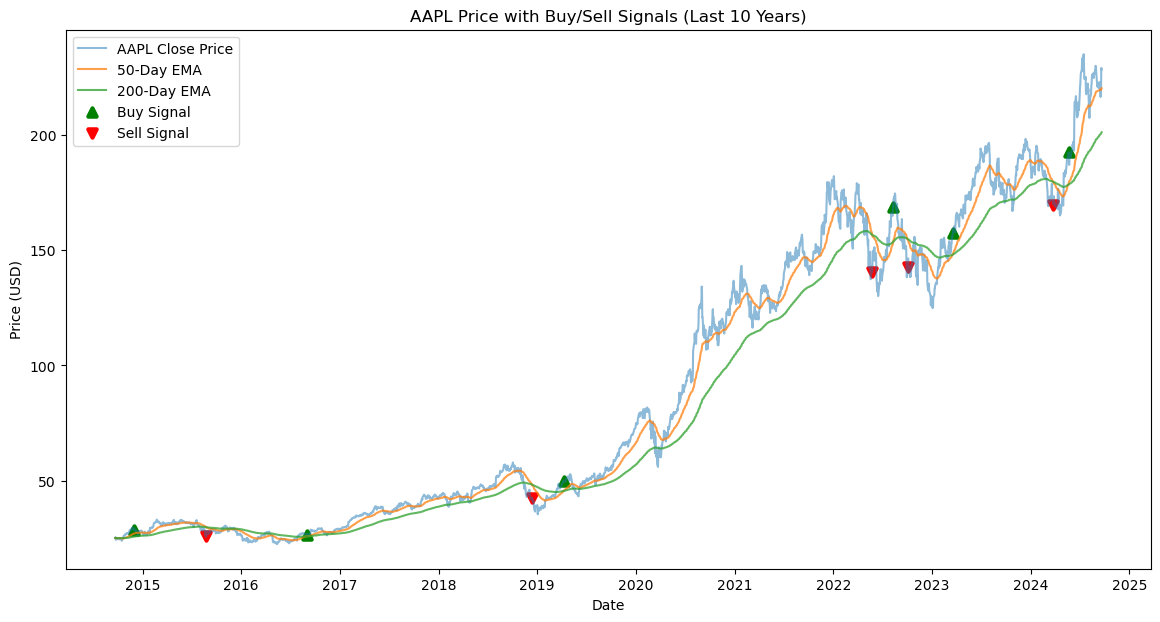

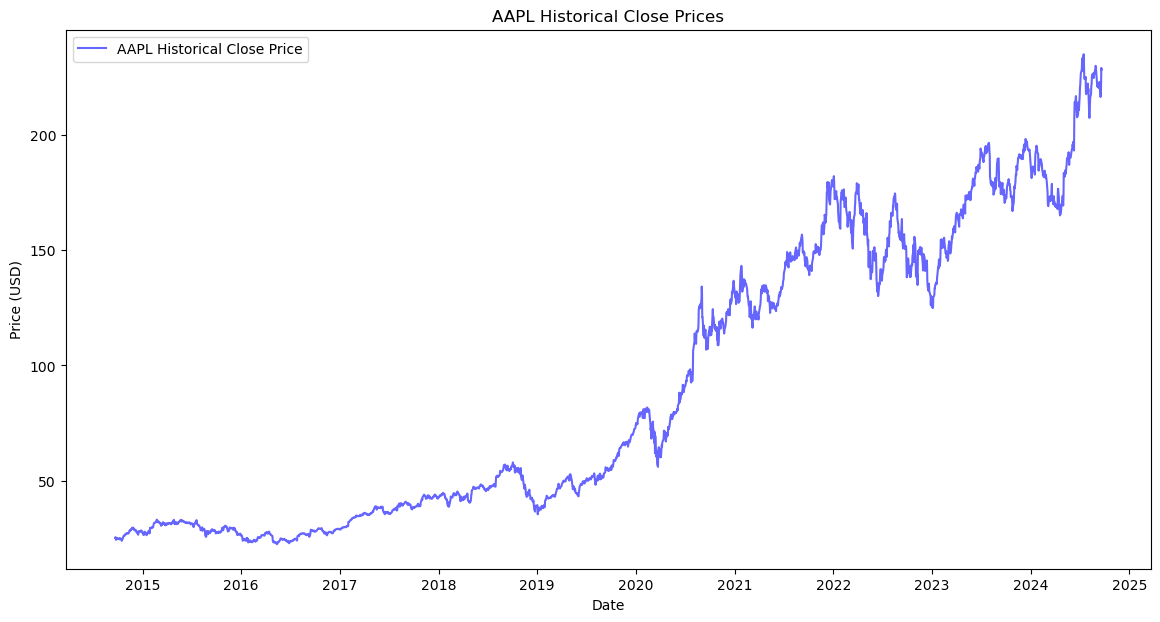

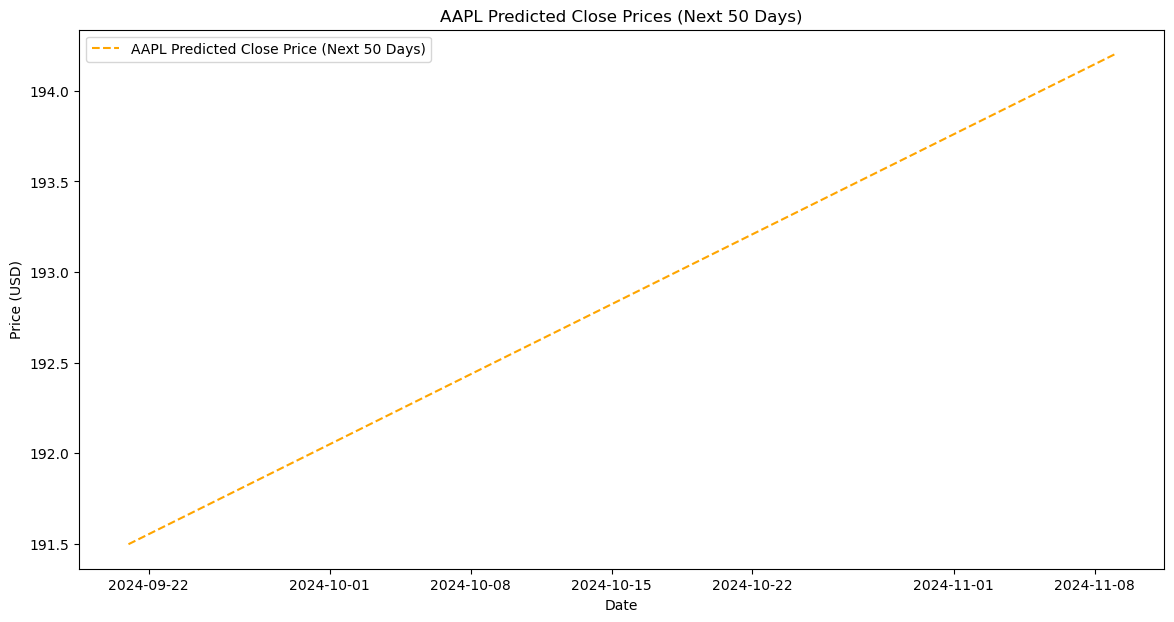

In [277]:
if __name__ == "__main__":
    ticker = 'AAPL'  # You can change the ticker symbol here
    stock_data = get_stock_data(ticker)
    stock_data = calculate_ema(stock_data)
    stock_data = generate_signals(stock_data)
    plot_signals(stock_data, ticker)
    # Prepare data
    X, y, last_day_date = prepare_data(stock_data)
    last_day = X[-1][0]  # Last day in numeric form
    
    # Train linear regression model
    model = train_linear_regression(X, y)
    
    # Predict future prices for the next 50 days
    future_predictions = predict_future_prices(model, last_day, last_day_date, prediction_days=50)
    
    # Plot historical and predicted prices separately
    plot_predictions_separately(stock_data, future_predictions, ticker)
